# Basic sweep example without conviniece functions 

In this notebook we illustrate how to use the bare sweep classes without the use of convinience functions. 

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from qcodes import new_experiment
from qcodes.dataset.plotting import plot_by_id
from qcodes import Parameter
from qcodes.sweep.base import ParameterSweep, ParameterWrapper, Nest, Chain
from qcodes.sweep.measurement import SweepMeasurement

In [2]:
experiment = new_experiment("sweep_introduction", sample_name="intro")

Let us make a 1D sweep first 

Starting experimental run with id: 21


([<matplotlib.axes._subplots.AxesSubplot at 0x1a51c9351d0>], [None])

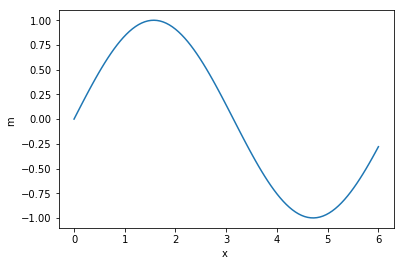

In [3]:
x = Parameter("x", set_cmd=None, get_cmd=None)
m = Parameter("m")
m.get = lambda:np.sin(x())

sweep_object = Nest([
    ParameterSweep(x, lambda: np.linspace(0, 6, 100)), 
    ParameterWrapper(m)
])

meas = SweepMeasurement()
meas.register_sweep(sweep_object)

with meas.run() as datasaver: 
    for data in sweep_object: 
        datasaver.add_result(*data.items())
    
    dataid = datasaver.run_id  # convenient to have for plotting
    
plot_by_id(dataid)

Now make a 2D sweep

Starting experimental run with id: 22


([<matplotlib.axes._subplots.AxesSubplot at 0x1a51c9e2390>],
 [<matplotlib.colorbar.Colorbar at 0x1a51caf1c18>])

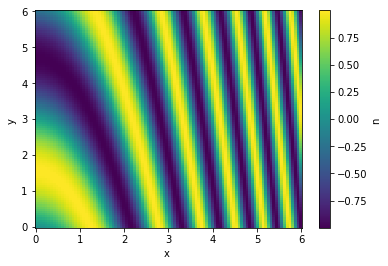

In [4]:
x = Parameter("x", set_cmd=None, get_cmd=None)
y = Parameter("y", set_cmd=None, get_cmd=None)

n = Parameter("n")
n.get = lambda:np.sin(x()**2 + y())

sweep_object = Nest([
    ParameterSweep(x, lambda: np.linspace(0, 6, 100)), 
    ParameterSweep(y, lambda: np.linspace(0, 6, 100)),
    ParameterWrapper(n)
])

meas = SweepMeasurement()
meas.register_sweep(sweep_object)

with meas.run() as datasaver: 
    for data in sweep_object: 
        datasaver.add_result(*data.items())
    
    dataid = datasaver.run_id  # convenient to have for plotting
    
plot_by_id(dataid)

We can also interleave 1D and 2D sweeps, or even nD sweeps

Starting experimental run with id: 23


([<matplotlib.axes._subplots.AxesSubplot at 0x1a51caa1da0>,
 [<matplotlib.colorbar.Colorbar at 0x1a51cd4e860>, None])

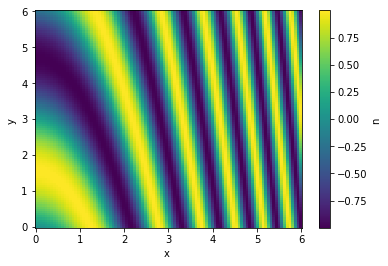

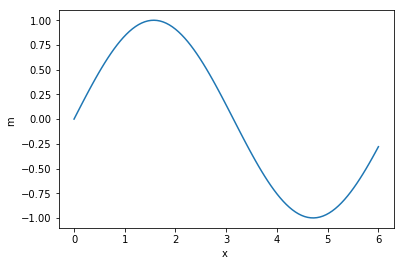

In [5]:
x = Parameter("x", set_cmd=None, get_cmd=None)
y = Parameter("y", set_cmd=None, get_cmd=None)

m = Parameter("m")
m.get = lambda:np.sin(x())

n = Parameter("n")
n.get = lambda:np.sin(x()**2 + y())

sweep_object = Nest([
    ParameterSweep(x, lambda: np.linspace(0, 6, 100)), 
    Chain([
        Nest([
            ParameterSweep(y, lambda: np.linspace(0, 6, 100)),
            ParameterWrapper(n)
        ]), 
        ParameterWrapper(m)
    ])
])

meas = SweepMeasurement()
meas.register_sweep(sweep_object)

with meas.run() as datasaver: 
    for data in sweep_object: 
        datasaver.add_result(*data.items())
    
    dataid = datasaver.run_id  # convenient to have for plotting
    
plot_by_id(dataid)